In [1]:
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import random
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
cwd = os.getcwd()
cwd

"/Users/aanast5/Documents/Master's Files/Semester 1/Applied AI Seminar /Individual Project"

## Import Caltech Birds Data

In [3]:
images = pd.read_csv('CUB_200_2011/images.txt', sep=' ', names=['img_id', 'filepath'])
image_class_labels = pd.read_csv('CUB_200_2011/image_class_labels.txt', sep=' ', names=['img_id', 'target'])


In [4]:
bounding_boxes = pd.read_csv("CUB_200_2011/bounding_boxes.txt", sep=" ", header=None, names=["image_id", "x", "y", "width", "height"])
train_test_split = pd.read_csv('CUB_200_2011/train_test_split.txt', sep=' ', names=['img_id', 'is_training_img'])

In [5]:
classes = pd.read_csv("CUB_200_2011/classes.txt", sep=" ", header=None, names=["target", "class_name"])

In [6]:
images.head()

,img_id,filepath
0,1,001.Black_footed_Albatross/Black_Footed_Albatr...
1,2,001.Black_footed_Albatross/Black_Footed_Albatr...
2,3,001.Black_footed_Albatross/Black_Footed_Albatr...
3,4,001.Black_footed_Albatross/Black_Footed_Albatr...
4,5,001.Black_footed_Albatross/Black_Footed_Albatr...


In [7]:
classes.head()

,target,class_name
0,1,001.Black_footed_Albatross
1,2,002.Laysan_Albatross
2,3,003.Sooty_Albatross
3,4,004.Groove_billed_Ani
4,5,005.Crested_Auklet


In [8]:
bounding_boxes.head()

,image_id,x,y,width,height
0,1,60.0,27.0,325.0,304.0
1,2,139.0,30.0,153.0,264.0
2,3,14.0,112.0,388.0,186.0
3,4,112.0,90.0,255.0,242.0
4,5,70.0,50.0,134.0,303.0


In [9]:
data_images = images.merge(image_class_labels, on='img_id')

In [10]:
data_images = data_images.merge(train_test_split, on='img_id')

In [11]:
data_images

,img_id,filepath,target,is_training_img
0,1,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0
1,2,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1
2,3,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0
3,4,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1
4,5,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1
...,...,...,...,...
11783,11784,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1
11784,11785,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0
11785,11786,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0
11786,11787,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1


In [12]:
data_images = data_images.merge(bounding_boxes, left_on = "img_id", right_on = "image_id")

In [13]:
data_images

,img_id,filepath,target,is_training_img,image_id,x,y,width,height
0,1,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,1,60.0,27.0,325.0,304.0
1,2,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,2,139.0,30.0,153.0,264.0
2,3,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,3,14.0,112.0,388.0,186.0
3,4,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,4,112.0,90.0,255.0,242.0
4,5,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,5,70.0,50.0,134.0,303.0
...,...,...,...,...,...,...,...,...,...
11783,11784,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1,11784,89.0,95.0,354.0,250.0
11784,11785,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0,11785,157.0,62.0,184.0,219.0
11785,11786,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0,11786,190.0,102.0,198.0,202.0
11786,11787,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1,11787,3.0,20.0,408.0,307.0


In [14]:
data_images = data_images.merge(classes,how='left', on="target")
data_images

,img_id,filepath,target,is_training_img,image_id,x,y,width,height,class_name
0,1,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,1,60.0,27.0,325.0,304.0,001.Black_footed_Albatross
1,2,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,2,139.0,30.0,153.0,264.0,001.Black_footed_Albatross
2,3,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,3,14.0,112.0,388.0,186.0,001.Black_footed_Albatross
3,4,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,4,112.0,90.0,255.0,242.0,001.Black_footed_Albatross
4,5,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,5,70.0,50.0,134.0,303.0,001.Black_footed_Albatross
...,...,...,...,...,...,...,...,...,...,...
11783,11784,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1,11784,89.0,95.0,354.0,250.0,200.Common_Yellowthroat
11784,11785,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0,11785,157.0,62.0,184.0,219.0,200.Common_Yellowthroat
11785,11786,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0,11786,190.0,102.0,198.0,202.0,200.Common_Yellowthroat
11786,11787,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1,11787,3.0,20.0,408.0,307.0,200.Common_Yellowthroat


In [15]:
data_images['class_name'] = data_images['class_name'].str.replace(r'^\d+\.', '', regex=True)

data_images

,img_id,filepath,target,is_training_img,image_id,x,y,width,height,class_name
0,1,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,1,60.0,27.0,325.0,304.0,Black_footed_Albatross
1,2,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,2,139.0,30.0,153.0,264.0,Black_footed_Albatross
2,3,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,3,14.0,112.0,388.0,186.0,Black_footed_Albatross
3,4,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,4,112.0,90.0,255.0,242.0,Black_footed_Albatross
4,5,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,5,70.0,50.0,134.0,303.0,Black_footed_Albatross
...,...,...,...,...,...,...,...,...,...,...
11783,11784,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1,11784,89.0,95.0,354.0,250.0,Common_Yellowthroat
11784,11785,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0,11785,157.0,62.0,184.0,219.0,Common_Yellowthroat
11785,11786,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0,11786,190.0,102.0,198.0,202.0,Common_Yellowthroat
11786,11787,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1,11787,3.0,20.0,408.0,307.0,Common_Yellowthroat


## Saving images to test and train direct

In [16]:
test_dir = os.path.join(cwd,"CUB_200_2011/images_train")
test_dir

"/Users/aanast5/Documents/Master's Files/Semester 1/Applied AI Seminar /Individual Project/CUB_200_2011/images_train"

In [17]:
# for i, path in enumerate(data_images["filepath"]):
#     if data_images["is_training_img"].iloc[i]:
#         train_dir = os.path.join(cwd,"CUB_200_2011/images_train")
#         os.makedirs(train_dir, exist_ok=True)
#         shutil.copy(src=os.path.join(cwd,"CUB_200_2011/images/"+ path), dst=os.path.join(train_dir, path.split('/')[1]))
#         print(i, ': Image is in training set. [', bool(data_images["is_training_img"].iloc[i]),']')
#         print('Image: ', path)
#         print('Destination:: ', train_dir)
#     else:
#         test_dir = os.path.join(cwd,"CUB_200_2011/images_test")
#         os.makedirs(test_dir, exist_ok=True)
#         shutil.copy(src=os.path.join(cwd,"CUB_200_2011/images/"+ path), dst=os.path.join(test_dir, path.split('/')[1]))
#         print(i, ': Image is in testing set. [', bool(data_images["is_training_img"].iloc[i]),']')
#         print('Image: ', path)
#         print('Destination:: ', test_dir)


In [18]:
data_images

,img_id,filepath,target,is_training_img,image_id,x,y,width,height,class_name
0,1,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,1,60.0,27.0,325.0,304.0,Black_footed_Albatross
1,2,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,2,139.0,30.0,153.0,264.0,Black_footed_Albatross
2,3,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,3,14.0,112.0,388.0,186.0,Black_footed_Albatross
3,4,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,4,112.0,90.0,255.0,242.0,Black_footed_Albatross
4,5,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,5,70.0,50.0,134.0,303.0,Black_footed_Albatross
...,...,...,...,...,...,...,...,...,...,...
11783,11784,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1,11784,89.0,95.0,354.0,250.0,Common_Yellowthroat
11784,11785,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0,11785,157.0,62.0,184.0,219.0,Common_Yellowthroat
11785,11786,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0,11786,190.0,102.0,198.0,202.0,Common_Yellowthroat
11786,11787,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1,11787,3.0,20.0,408.0,307.0,Common_Yellowthroat


In [19]:
data_images.iloc[0]["filepath"]

'001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg'

In [20]:
data_images

,img_id,filepath,target,is_training_img,image_id,x,y,width,height,class_name
0,1,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,1,60.0,27.0,325.0,304.0,Black_footed_Albatross
1,2,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,2,139.0,30.0,153.0,264.0,Black_footed_Albatross
2,3,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,3,14.0,112.0,388.0,186.0,Black_footed_Albatross
3,4,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,4,112.0,90.0,255.0,242.0,Black_footed_Albatross
4,5,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,5,70.0,50.0,134.0,303.0,Black_footed_Albatross
...,...,...,...,...,...,...,...,...,...,...
11783,11784,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1,11784,89.0,95.0,354.0,250.0,Common_Yellowthroat
11784,11785,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0,11785,157.0,62.0,184.0,219.0,Common_Yellowthroat
11785,11786,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0,11786,190.0,102.0,198.0,202.0,Common_Yellowthroat
11786,11787,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1,11787,3.0,20.0,408.0,307.0,Common_Yellowthroat


## Train, test, validation dataset

In [21]:
data_images["is_training_img"].unique()

array([0, 1])

In [22]:
train_images = data_images[data_images["is_training_img"]==1]
test_images =  data_images[data_images["is_training_img"]==0]
train_images

,img_id,filepath,target,is_training_img,image_id,x,y,width,height,class_name
1,2,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,2,139.0,30.0,153.0,264.0,Black_footed_Albatross
3,4,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,4,112.0,90.0,255.0,242.0,Black_footed_Albatross
4,5,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,5,70.0,50.0,134.0,303.0,Black_footed_Albatross
6,7,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,7,7.0,75.0,420.0,262.0,Black_footed_Albatross
7,8,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,8,78.0,86.0,333.0,158.0,Black_footed_Albatross
...,...,...,...,...,...,...,...,...,...,...
11777,11778,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1,11778,35.0,115.0,290.0,197.0,Common_Yellowthroat
11780,11781,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1,11781,41.0,33.0,379.0,426.0,Common_Yellowthroat
11781,11782,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1,11782,140.0,125.0,144.0,172.0,Common_Yellowthroat
11783,11784,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1,11784,89.0,95.0,354.0,250.0,Common_Yellowthroat


In [23]:
test_images

,img_id,filepath,target,is_training_img,image_id,x,y,width,height,class_name
0,1,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,1,60.0,27.0,325.0,304.0,Black_footed_Albatross
2,3,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,3,14.0,112.0,388.0,186.0,Black_footed_Albatross
5,6,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,6,33.0,53.0,251.0,395.0,Black_footed_Albatross
9,10,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,10,27.0,4.0,199.0,201.0,Black_footed_Albatross
11,12,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,12,47.0,21.0,179.0,249.0,Black_footed_Albatross
...,...,...,...,...,...,...,...,...,...,...
11779,11780,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0,11780,44.0,114.0,269.0,230.0,Common_Yellowthroat
11782,11783,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0,11783,96.0,71.0,243.0,216.0,Common_Yellowthroat
11784,11785,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0,11785,157.0,62.0,184.0,219.0,Common_Yellowthroat
11785,11786,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0,11786,190.0,102.0,198.0,202.0,Common_Yellowthroat


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Take 10% of test data for validation
test_images, validation_images = train_test_split(test_images, test_size=0.1, random_state=42)

print("Test Set:")
print(test_images.head())
print("\nValidation Set:")
print(validation_images.head())

Test Set:
      img_id                                           filepath  target  \
2759    2760  048.European_Goldfinch/European_Goldfinch_0108...      48   
5490    5491  094.White_breasted_Nuthatch/White_Breasted_Nut...      94   
2264    2265  040.Olive_sided_Flycatcher/Olive_Sided_Flycatc...      40   
8394    8395      143.Caspian_Tern/Caspian_Tern_0058_145886.jpg     143   
1267    1268  023.Brandt_Cormorant/Brandt_Cormorant_0036_229...      23   

      is_training_img  image_id      x      y  width  height  \
2759                0      2760  130.0   82.0  114.0   130.0   
5490                0      5491   26.0   11.0  274.0   373.0   
2264                0      2265  133.0  127.0  108.0   225.0   
8394                0      8395   79.0   89.0  329.0   138.0   
1267                0      1268  222.0   32.0  178.0   331.0   

                   class_name  
2759       European_Goldfinch  
5490  White_breasted_Nuthatch  
2264   Olive_sided_Flycatcher  
8394             Caspian_T

## Class Distribution

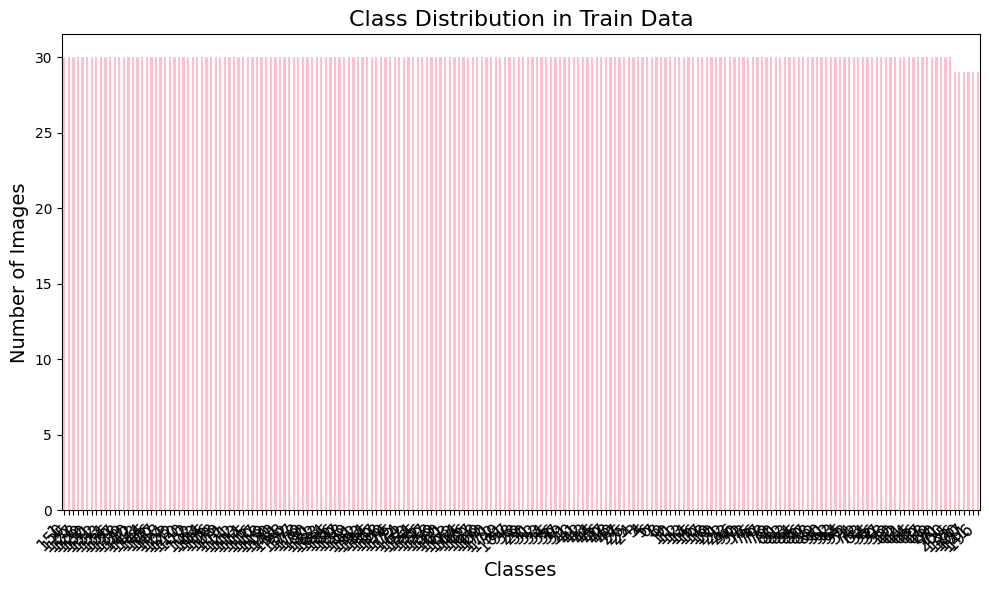

In [27]:
# Count the number of samples per class
class_counts = train_images['target'].value_counts()

# Plot the class distribution
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='pink')
plt.title("Class Distribution in Train Data", fontsize=16)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()

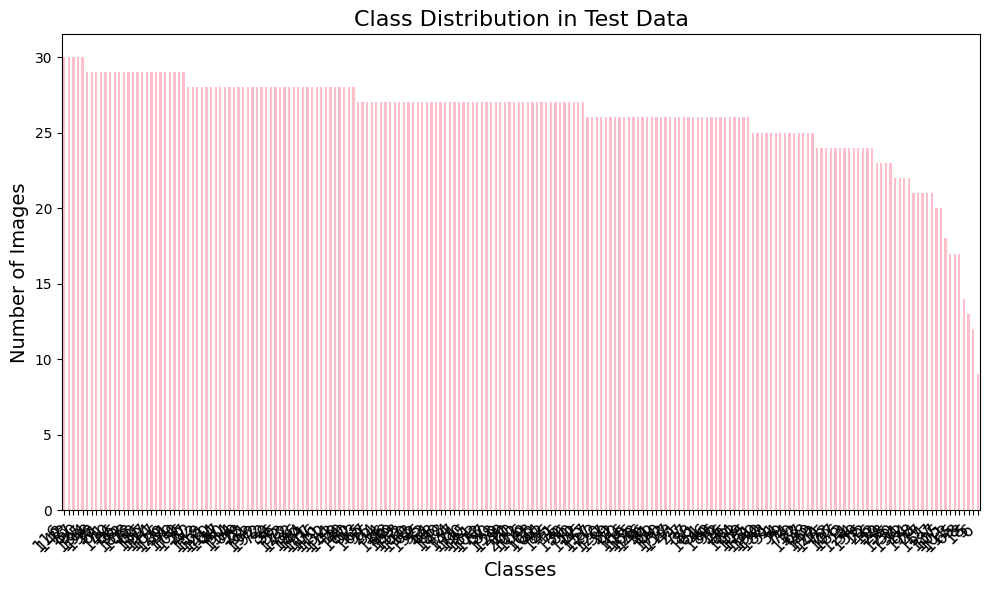

In [28]:
class_counts = test_images['target'].value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='pink')
plt.title("Class Distribution in Test Data", fontsize=16)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()

## Bounding box example plot

In [29]:
random_samples = data_images.sample(9)

for i, row in enumerate(random_samples.itertuples()):
    image_path = cwd + "/CUB_200_2011/images/" + row.filepath
    image = Image.open(image_path)

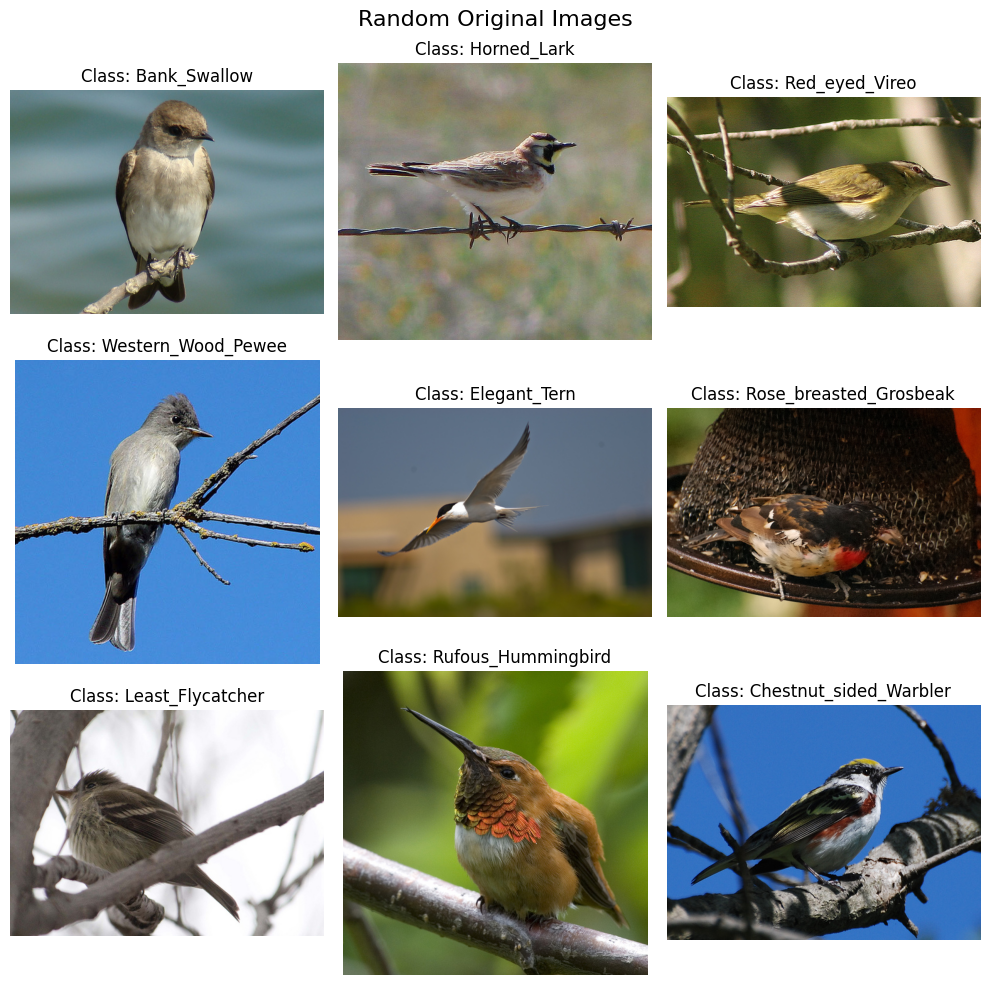

In [30]:
random_samples = data_images.sample(9)

plt.figure(figsize=(10, 10))
for i, row in enumerate(random_samples.itertuples()):
    image_path = cwd + "/CUB_200_2011/images/" + row.filepath
    image = Image.open(image_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Class: {row.class_name}")
    plt.axis("off")
plt.suptitle("Random Original Images", fontsize=16)
plt.tight_layout()
plt.show()


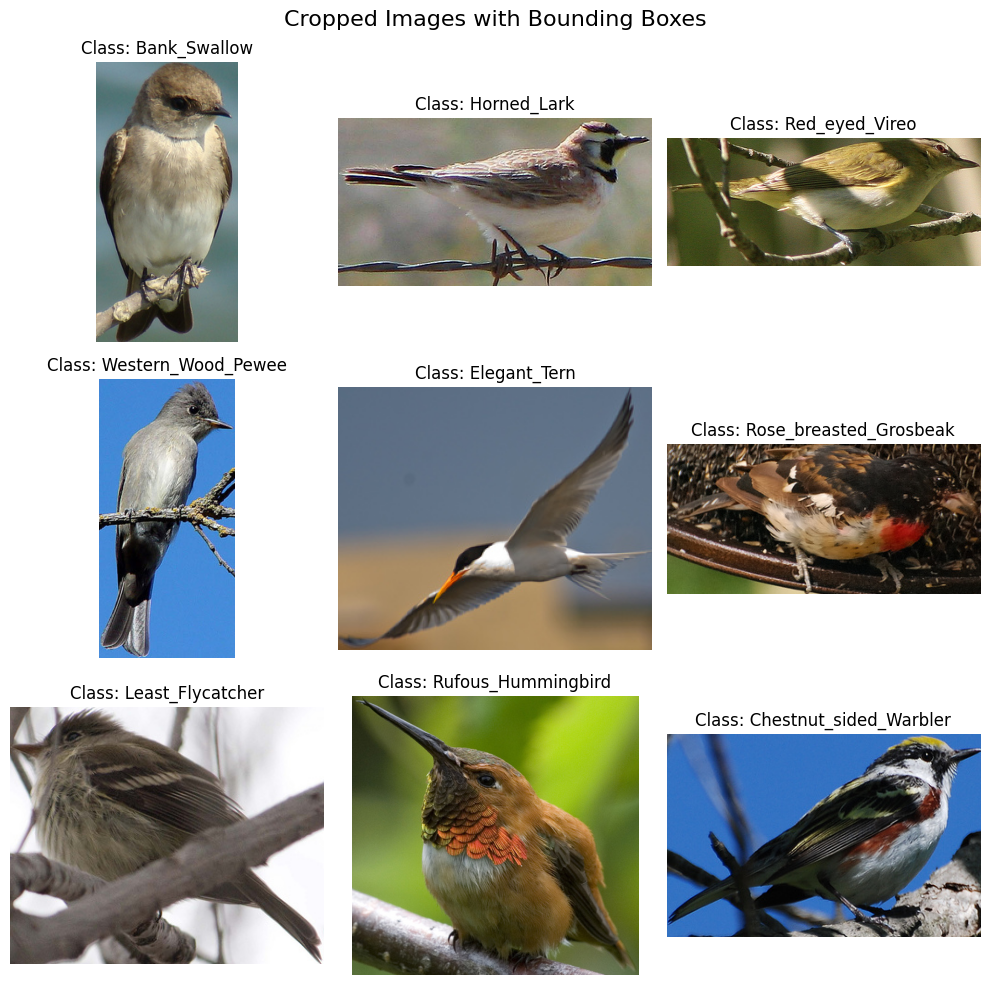

In [31]:
plt.figure(figsize=(10, 10))
for i, row in enumerate(random_samples.itertuples()):
    image_path = cwd + "/CUB_200_2011/images/" + row.filepath
    image = Image.open(image_path)
    cropped_image = image.crop((row.x, row.y, row.x + row.width, row.y + row.height))
    plt.subplot(3, 3, i + 1)
    plt.imshow(cropped_image)
    plt.title(f"Class: {row.class_name}")
    plt.axis("off")
plt.suptitle("Cropped Images with Bounding Boxes", fontsize=16)
plt.tight_layout()
plt.show()

In [32]:
data_images

,img_id,filepath,target,is_training_img,image_id,x,y,width,height,class_name
0,1,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,1,60.0,27.0,325.0,304.0,Black_footed_Albatross
1,2,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,2,139.0,30.0,153.0,264.0,Black_footed_Albatross
2,3,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,3,14.0,112.0,388.0,186.0,Black_footed_Albatross
3,4,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,4,112.0,90.0,255.0,242.0,Black_footed_Albatross
4,5,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,5,70.0,50.0,134.0,303.0,Black_footed_Albatross
...,...,...,...,...,...,...,...,...,...,...
11783,11784,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1,11784,89.0,95.0,354.0,250.0,Common_Yellowthroat
11784,11785,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0,11785,157.0,62.0,184.0,219.0,Common_Yellowthroat
11785,11786,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,0,11786,190.0,102.0,198.0,202.0,Common_Yellowthroat
11786,11787,200.Common_Yellowthroat/Common_Yellowthroat_00...,200,1,11787,3.0,20.0,408.0,307.0,Common_Yellowthroat


## Loading images

In [33]:
train_imgs = train_images[["filepath","class_name"]]
train_imgs.reset_index(inplace=True,drop=True)
test_imgs = test_images[["filepath","class_name"]]
test_imgs.reset_index(inplace=True,drop=True)
val_imgs = validation_images[["filepath","class_name"]]
val_imgs.reset_index(inplace=True,drop=True)

In [34]:
train_imgs

,filepath,class_name
0,001.Black_footed_Albatross/Black_Footed_Albatr...,Black_footed_Albatross
1,001.Black_footed_Albatross/Black_Footed_Albatr...,Black_footed_Albatross
2,001.Black_footed_Albatross/Black_Footed_Albatr...,Black_footed_Albatross
3,001.Black_footed_Albatross/Black_Footed_Albatr...,Black_footed_Albatross
4,001.Black_footed_Albatross/Black_Footed_Albatr...,Black_footed_Albatross
...,...,...
5989,200.Common_Yellowthroat/Common_Yellowthroat_00...,Common_Yellowthroat
5990,200.Common_Yellowthroat/Common_Yellowthroat_00...,Common_Yellowthroat
5991,200.Common_Yellowthroat/Common_Yellowthroat_00...,Common_Yellowthroat
5992,200.Common_Yellowthroat/Common_Yellowthroat_00...,Common_Yellowthroat


In [35]:
# Iterate over the rows and load the images
for i, row in train_imgs.iterrows():
    image_path = os.path.join(cwd, "CUB_200_2011/images", row.filepath)
    try:
        image = Image.open(image_path)
        train_imgs.loc[i, "image"] = image
    except Exception as e:
        print(f"Error loading image at {image_path}: {e}")

/var/folders/5h/1cc6fvqn1nsf3cqhcndrlz280000gn/T/ipykernel_91673/2976305390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_imgs.loc[i, "image"] = image


In [36]:
# Iterate over the rows and load the images
for i, row in test_imgs.iterrows():
    image_path = os.path.join(cwd, "CUB_200_2011/images", row.filepath)
    try:
        image = Image.open(image_path)
        test_imgs.loc[i, "image"] = image
    except Exception as e:
        print(f"Error loading image at {image_path}: {e}")

/var/folders/5h/1cc6fvqn1nsf3cqhcndrlz280000gn/T/ipykernel_91673/762549671.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_imgs.loc[i, "image"] = image


In [37]:
# Iterate over the rows and load the images
for i, row in val_imgs.iterrows():
    image_path = os.path.join(cwd, "CUB_200_2011/images", row.filepath)
    try:
        image = Image.open(image_path)
        val_imgs.loc[i, "image"] = image
    except Exception as e:
        print(f"Error loading image at {image_path}: {e}")

/var/folders/5h/1cc6fvqn1nsf3cqhcndrlz280000gn/T/ipykernel_91673/423337269.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_imgs.loc[i, "image"] = image


In [38]:
train_imgs.drop(columns="filepath",inplace=True)
val_imgs.drop(columns="filepath",inplace=True)
test_imgs.drop(columns="filepath",inplace=True)


/var/folders/5h/1cc6fvqn1nsf3cqhcndrlz280000gn/T/ipykernel_91673/1450306987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_imgs.drop(columns="filepath",inplace=True)
/var/folders/5h/1cc6fvqn1nsf3cqhcndrlz280000gn/T/ipykernel_91673/1450306987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_imgs.drop(columns="filepath",inplace=True)
/var/folders/5h/1cc6fvqn1nsf3cqhcndrlz280000gn/T/ipykernel_91673/1450306987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [39]:
test_imgs

,class_name,image
0,European_Goldfinch,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,White_breasted_Nuthatch,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,Olive_sided_Flycatcher,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,Caspian_Tern,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,Brandt_Cormorant,<PIL.JpegImagePlugin.JpegImageFile image mode=...
...,...,...
5209,White_crowned_Sparrow,<PIL.JpegImagePlugin.JpegImageFile image mode=...
5210,Wilson_Warbler,<PIL.JpegImagePlugin.JpegImageFile image mode=...
5211,Worm_eating_Warbler,<PIL.JpegImagePlugin.JpegImageFile image mode=...
5212,American_Three_toed_Woodpecker,<PIL.JpegImagePlugin.JpegImageFile image mode=...


## Image processing 

In [40]:
from transformers import ViTImageProcessor

model_name = "google/vit-large-patch16-224"
processor = ViTImageProcessor.from_pretrained(model_name)
processor

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ViTImageProcessor {
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [41]:
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    ToTensor,
    Resize,
)

# Get configurations from ViT processor
image_mean, image_std = processor.image_mean, processor.image_std
size = processor.size["height"]

# Normalizes the image pixels by subtracting the mean and dividing by the std from the pretrained model configurations
normalize = Normalize(mean=image_mean, std=image_std)

# Compose: Combines a series of image transformations into one pipeline.
train_transforms = Compose(
    [
        RandomResizedCrop(size),
        RandomHorizontalFlip(),
        ToTensor(),
        normalize,
    ]
)
val_transforms = Compose(
    [
        Resize(size),
        CenterCrop(size),
        ToTensor(),
        normalize,
    ]
)
test_transforms = Compose(
    [
        Resize(size),
        CenterCrop(size),
        ToTensor(),
        normalize,
    ]
)

In [42]:
train_imgs

,class_name,image
0,Black_footed_Albatross,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,Black_footed_Albatross,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,Black_footed_Albatross,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,Black_footed_Albatross,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,Black_footed_Albatross,<PIL.JpegImagePlugin.JpegImageFile image mode=...
...,...,...
5989,Common_Yellowthroat,<PIL.JpegImagePlugin.JpegImageFile image mode=...
5990,Common_Yellowthroat,<PIL.JpegImagePlugin.JpegImageFile image mode=...
5991,Common_Yellowthroat,<PIL.JpegImagePlugin.JpegImageFile image mode=...
5992,Common_Yellowthroat,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [43]:
train_imgs

,class_name,image
0,Black_footed_Albatross,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,Black_footed_Albatross,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,Black_footed_Albatross,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,Black_footed_Albatross,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,Black_footed_Albatross,<PIL.JpegImagePlugin.JpegImageFile image mode=...
...,...,...
5989,Common_Yellowthroat,<PIL.JpegImagePlugin.JpegImageFile image mode=...
5990,Common_Yellowthroat,<PIL.JpegImagePlugin.JpegImageFile image mode=...
5991,Common_Yellowthroat,<PIL.JpegImagePlugin.JpegImageFile image mode=...
5992,Common_Yellowthroat,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [44]:
def apply_train_transforms(row):
    #print(row["image"])
    row["pixel_values"] = train_transforms(row["image"].convert("RGB"))
    return row

def apply_val_transforms(row):
    row["pixel_values"] = val_transforms(row["image"].convert("RGB"))
    return row

def apply_test_transforms(row):
    row["pixel_values"] = test_transforms(row["image"].convert("RGB"))
    return row

# Apply transforms to train, validation, and test datasets
train_imgs = train_imgs.apply(apply_train_transforms, axis=1)
val_imgs = val_imgs.apply(apply_val_transforms, axis=1)
test_imgs = test_imgs.apply(apply_test_transforms, axis=1) 

In [45]:
test_imgs.head()

,class_name,image,pixel_values
0,European_Goldfinch,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[tensor(-0.3490), tensor(-0.3569), tensor(-0..."
1,White_breasted_Nuthatch,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[tensor(-0.0118), tensor(-0.0275), tensor(-0..."
2,Olive_sided_Flycatcher,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[tensor(0.4118), tensor(0.4118), tensor(0.41..."
3,Caspian_Tern,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[tensor(-0.4980), tensor(-0.4824), tensor(-0..."
4,Brandt_Cormorant,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[tensor(0.3098), tensor(0.3098), tensor(0.30..."


In [47]:
train_dl

We need to change the classification head of the model with the right number of units (i.e. equal to number of output classes), we have to add a parameter num_labels.

In [48]:
id2label = {id: label for id, label in enumerate(train_imgs["class_name"].unique())}
label2id = {label: id for id, label in id2label.items()}
label2id

{'Black_footed_Albatross': 0,
 'Laysan_Albatross': 1,
 'Sooty_Albatross': 2,
 'Groove_billed_Ani': 3,
 'Crested_Auklet': 4,
 'Least_Auklet': 5,
 'Parakeet_Auklet': 6,
 'Rhinoceros_Auklet': 7,
 'Brewer_Blackbird': 8,
 'Red_winged_Blackbird': 9,
 'Rusty_Blackbird': 10,
 'Yellow_headed_Blackbird': 11,
 'Bobolink': 12,
 'Indigo_Bunting': 13,
 'Lazuli_Bunting': 14,
 'Painted_Bunting': 15,
 'Cardinal': 16,
 'Spotted_Catbird': 17,
 'Gray_Catbird': 18,
 'Yellow_breasted_Chat': 19,
 'Eastern_Towhee': 20,
 'Chuck_will_Widow': 21,
 'Brandt_Cormorant': 22,
 'Red_faced_Cormorant': 23,
 'Pelagic_Cormorant': 24,
 'Bronzed_Cowbird': 25,
 'Shiny_Cowbird': 26,
 'Brown_Creeper': 27,
 'American_Crow': 28,
 'Fish_Crow': 29,
 'Black_billed_Cuckoo': 30,
 'Mangrove_Cuckoo': 31,
 'Yellow_billed_Cuckoo': 32,
 'Gray_crowned_Rosy_Finch': 33,
 'Purple_Finch': 34,
 'Northern_Flicker': 35,
 'Acadian_Flycatcher': 36,
 'Great_Crested_Flycatcher': 37,
 'Least_Flycatcher': 38,
 'Olive_sided_Flycatcher': 39,
 'Scissor_ta

In [169]:
train_imgs.rename(columns = {"class_name":"label"}, inplace=True)

In [170]:
val_imgs.rename(columns = {"class_name": "label"}, inplace=True)

In [171]:
val_imgs.reset_index(drop=True, inplace=True)
train_imgs.reset_index(drop=True, inplace=True)

In [174]:
train_imgs.head(1)

,label,image,pixel_values
0,Black_footed_Albatross,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[[tensor(0.8745), tensor(0.8667), tensor(0.87..."


In [180]:
train_ds = train_imgs[["label", "pixel_values"]]
val_ds = val_imgs[["label", "pixel_values"]]
val_ds.head(1)

,label,pixel_values
0,Myrtle_Warbler,"[[[tensor(-0.8039), tensor(-0.7412), tensor(-0..."


In [181]:
train_ds["label"] = train_ds["label"].map(label2id)
val_ds["label"] = val_ds["label"].map(label2id)
val_ds.head(1)

/var/folders/5h/1cc6fvqn1nsf3cqhcndrlz280000gn/T/ipykernel_91673/3919243416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ds["label"] = train_ds["label"].map(label2id)
/var/folders/5h/1cc6fvqn1nsf3cqhcndrlz280000gn/T/ipykernel_91673/3919243416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_ds["label"] = val_ds["label"].map(label2id)


,label,pixel_values
0,170,"[[[tensor(-0.8039), tensor(-0.7412), tensor(-0..."


In [183]:
from transformers import ViTForImageClassification

labels  = train_imgs['label'].unique()

model = ViTForImageClassification.from_pretrained(
    model_name, 
    num_labels = len(labels),
    id2label=id2label, 
    label2id=label2id, 
    ignore_mismatched_sizes=True
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-large-patch16-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([200, 1024]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([200]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [184]:
from transformers import TrainingArguments, Trainer
import numpy as np
import accelerate

train_args = TrainingArguments(
  output_dir="./results_model",
  per_device_train_batch_size=16,
  eval_strategy="steps",
  num_train_epochs=2,
  fp16=False,
  save_steps=10,
  eval_steps=10,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

In [185]:
# import torch
# from torch.utils.data import DataLoader

# def collate_fn(examples):
#     # Stacks the pixel values of all examples into a single tensor and collects labels into a tensor
#     pixel_values = torch.stack([example["pixel_values"] for example in examples])
#     labels = torch.tensor([example["label"] for example in examples])
#     return {"pixel_values": pixel_values, "label": labels}

# # Create a DataLoader for the training dataset, with custom collation and a batch size of 4
# train_dl = DataLoader(train_imgs, collate_fn=collate_fn, batch_size=4)
# train_dl

In [244]:
class CustomDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        pixel_values = torch.tensor(row["pixel_values"]).contiguous()  # Make sure it is contiguous
        label = torch.tensor(row["label"]).contiguous()  # Ensure label is contiguous as well
        # print(f"Pixel values shape: {pixel_values.shape}")
        # print(f"Labels shape: {label.shape}")
        return {
            "pixel_values": pixel_values,
            "labels": label,
        }




In [245]:
def collate_fn(examples):
    # Stack the pixel values to form a batch
    pixel_values = torch.stack([example["pixel_values"] for example in examples]).contiguous()  # Shape: [batch_size, 3, 224, 224]
    # Example for ensuring contiguity before reshape in forward pass
    pixel_values = pixel_values.reshape(-1, 3, 224, 224).contiguous()

    # Stack the labels to form a batch
    labels = torch.tensor([example["labels"] for example in examples], dtype=torch.long).contiguous()  # Shape: [batch_size]
    
    return {"pixel_values": pixel_values, "labels": labels}


In [246]:
train_dataset = CustomDataset(train_ds)
val_dataset = CustomDataset(val_ds)

train_dataloader = DataLoader(train_dataset, batch_size=4, collate_fn=collate_fn)

# Fetch a batch
batch = next(iter(train_dataloader))

# Print shapes of pixel_values and labels
for k, v in batch.items():
    if isinstance(v, torch.Tensor):
        print(k, v.shape)

pixel_values torch.Size([4, 3, 224, 224])
labels torch.Size([4])


/var/folders/5h/1cc6fvqn1nsf3cqhcndrlz280000gn/T/ipykernel_91673/156002674.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pixel_values = torch.tensor(row["pixel_values"]).contiguous()  # Make sure it is contiguous


In [247]:
train_dataset = CustomDataset(train_ds)
val_dataset = CustomDataset(val_ds)
trainer = Trainer(
    model,
    train_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=collate_fn
)
trainer.train()

/var/folders/5h/1cc6fvqn1nsf3cqhcndrlz280000gn/T/ipykernel_91673/156002674.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pixel_values = torch.tensor(row["pixel_values"]).contiguous()  # Make sure it is contiguous


RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.